## Введение в искусственные нейронные сети
### Урок 4. Сверточные нейронные сети

1. Обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10

2. Оценить рост точности при увеличении ширины сети (больше фильтров)

3. Оценить рост точности при увеличении глубины сети (больше слоев)

4. Сравнить с точностью полносвязной сети для этой выборки

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

import os

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Загрузка, предварительный анализ и подготовка данных. 

In [3]:
# Установка параметров нейросети
batch_size = 64
num_classes = 10
epochs = 10

# Разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# Преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [4]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

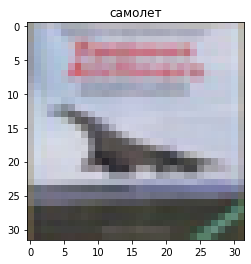

In [5]:
N = 3

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [6]:
results = pd.DataFrame() # сводная таблица результатов
step = [] # шаг
desc = [] # описание
train_acc = [] # результат на трейне
test_acc = [] # результат на тесте

### Задача 1

Обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10


Model: "cnn_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928 

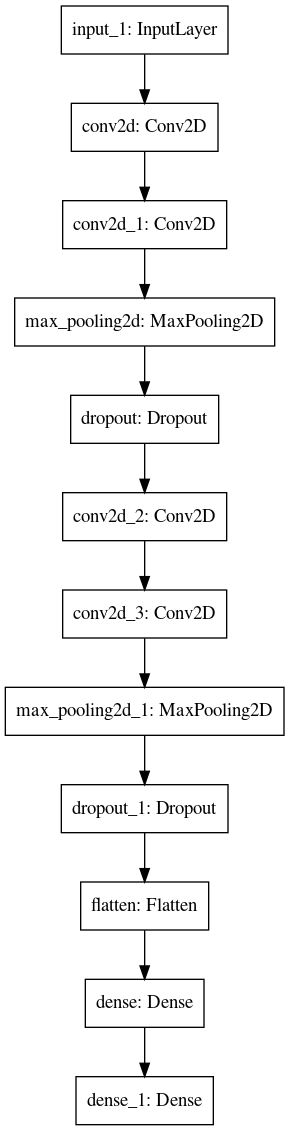

In [7]:
# Входные данные модели 
model_input = Input(shape=X_train.shape[1:])

# БЛОК 1: Свертка и max-pooling
x = Conv2D(32, (3, 3), activation='relu', padding='same')(model_input)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# БЛОК 2: Свертка и max-pooling
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# БЛОК 3: Полносвязанный слой 
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

# Создание модели 
model_1 = Model(model_input, x, name='cnn_1')

# Компиляция модели
model_1.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])


model_1.summary()
keras.utils.plot_model(model_1, "model.png")

In [8]:
history_1 = model_1.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 9s 9ms/step - loss: 2.1473 - accuracy: 0.2031 - val_loss: 2.0347 - val_accuracy: 0.2554
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 1.8675 - accuracy: 0.3276 - val_loss: 1.7529 - val_accuracy: 0.3799
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 1.6900 - accuracy: 0.3890 - val_loss: 1.6678 - val_accuracy: 0.4055
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 1.5897 - accuracy: 0.4260 - val_loss: 1.5625 - val_accuracy: 0.4352
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 1.5236 - accuracy: 0.4497 - val_loss: 1.4600 - val_accuracy: 0.4756
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 1.4579 - accuracy: 0.4749 - val_loss: 1.3771 - val_accuracy: 0.5048
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 1.3957 - accuracy: 0.4982 - val_loss: 1.5497 - val_accuracy: 0.4608
Epoch 

#### Оценка результатов 

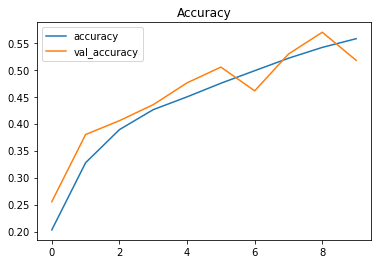

In [9]:
pd.DataFrame(history_1.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [10]:
train_loss, train_m = model_1.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_1.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(1)
desc.append('Базовая модель')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 6s - loss: 1.3948 - accuracy: 0.5194
313/313 - 1s - loss: 1.4118 - accuracy: 0.5173
train_loss: 1.394811749458313, train_accuracy: 0.5193600058555603
test_loss: 1.4117867946624756, test_accuracy: 0.517300009727478


313/313 [==============================] - 2s 5ms/step - loss: 1.4118 - accuracy: 0.5173
Test loss: 1.4117867946624756
Test accuracy: 0.517300009727478


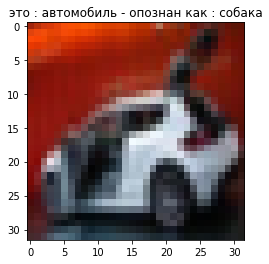

In [11]:
N = 6
scores = model_1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_p = model_1.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()


### Задача 2

Оценить рост точности при увеличении ширины сети (больше фильтров)

Model: "cnn_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 256)       295168

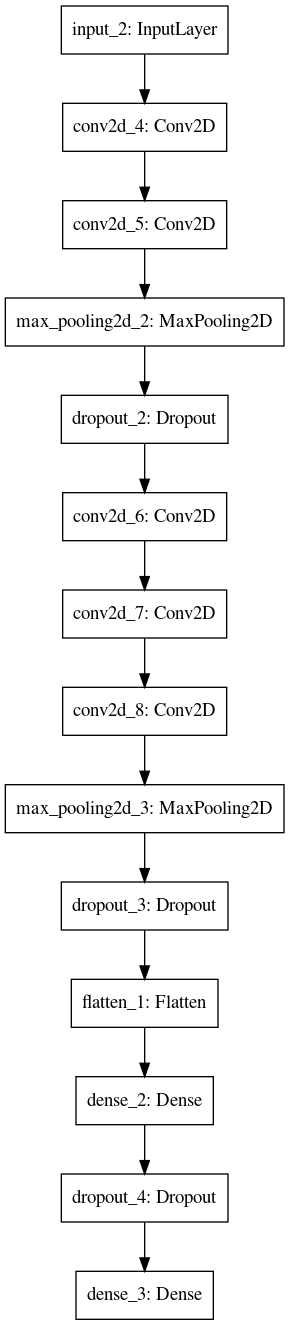

In [12]:
# Входные данные модели 
model_input = Input(shape=X_train.shape[1:])

# БЛОК 1: Свертка и max-pooling
x = Conv2D(32, (3, 3), activation='relu', padding='same')(model_input)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# БЛОК 2: Свертка и max-pooling
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# БЛОК 3: Полносвязанный слой 
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

# Создание модели 
model_2 = Model(model_input, x, name='cnn_2')

# Компиляция модели
model_2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])


model_2.summary()
keras.utils.plot_model(model_2, "model.png")

In [13]:
history_2 = model_2.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 18s 22ms/step - loss: 2.2086 - accuracy: 0.1704 - val_loss: 2.0036 - val_accuracy: 0.2736
Epoch 2/10
782/782 [==============================] - 17s 21ms/step - loss: 1.9780 - accuracy: 0.2800 - val_loss: 1.8478 - val_accuracy: 0.3463
Epoch 3/10
782/782 [==============================] - 17s 21ms/step - loss: 1.8170 - accuracy: 0.3433 - val_loss: 1.7802 - val_accuracy: 0.3643
Epoch 4/10
782/782 [==============================] - 17s 21ms/step - loss: 1.7016 - accuracy: 0.3817 - val_loss: 1.7819 - val_accuracy: 0.3681
Epoch 5/10
782/782 [==============================] - 17s 21ms/step - loss: 1.5962 - accuracy: 0.4184 - val_loss: 1.5812 - val_accuracy: 0.4282
Epoch 6/10
782/782 [==============================] - 17s 21ms/step - loss: 1.5013 - accuracy: 0.4535 - val_loss: 1.3923 - val_accuracy: 0.4940
Epoch 7/10
782/782 [==============================] - 17s 21ms/step - loss: 1.4325 - accuracy: 0.4829 - val_loss: 1.4805 - val_accuracy:

#### Оценка результатов 

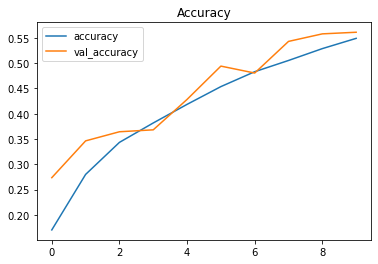

In [14]:
pd.DataFrame(history_2.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [16]:
train_loss, train_m = model_2.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_2.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(2)
desc.append('Шире - больше каналов')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 9s - loss: 1.2278 - accuracy: 0.5656
313/313 - 2s - loss: 1.2421 - accuracy: 0.5609
train_loss: 1.2277554273605347, train_accuracy: 0.5656200051307678
test_loss: 1.2420555353164673, test_accuracy: 0.5608999729156494


313/313 [==============================] - 2s 6ms/step - loss: 1.2421 - accuracy: 0.5609
Test loss: 1.2420555353164673
Test accuracy: 0.5608999729156494


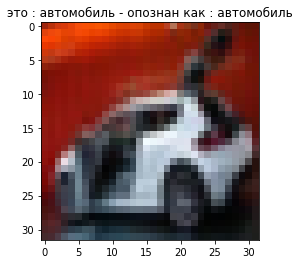

In [17]:
N = 6
scores = model_2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_p = model_2.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()


### Задача 3

Оценить рост точности при увеличении глубины сети (больше слоев)

Model: "cnn_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        36928 

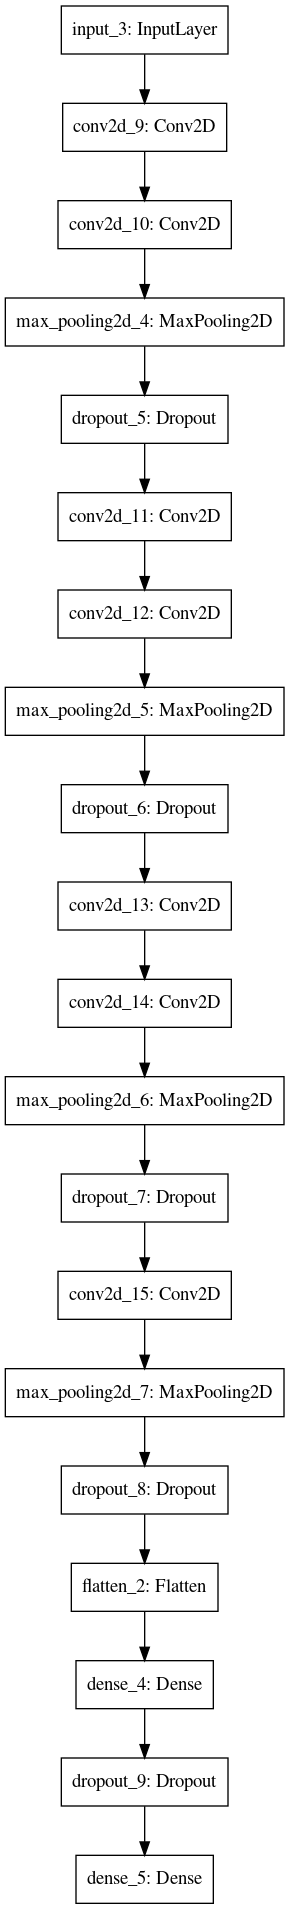

In [18]:
# Входные данные модели 
model_input = Input(shape=X_train.shape[1:])

# БЛОК 1: Свертка и max-pooling
x = Conv2D(32, (3, 3), activation='relu', padding='same')(model_input)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# БЛОК 2: Свертка и max-pooling
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# БЛОК 3: Свертка и max-pooling
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# БЛОК 4: Свертка и max-pooling
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# БЛОК 5: Полносвязанный слой 
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

# Создание модели 
model_3 = Model(model_input, x, name='cnn_3')

# Компиляция модели
model_3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])


model_3.summary()
keras.utils.plot_model(model_3, "model.png")

In [19]:
history_3 = model_3.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 10s 12ms/step - loss: 2.2998 - accuracy: 0.1064 - val_loss: 2.3001 - val_accuracy: 0.1001
Epoch 2/10
782/782 [==============================] - 9s 12ms/step - loss: 2.2277 - accuracy: 0.1605 - val_loss: 2.2789 - val_accuracy: 0.1195
Epoch 3/10
782/782 [==============================] - 9s 12ms/step - loss: 2.1362 - accuracy: 0.1862 - val_loss: 2.1636 - val_accuracy: 0.1753
Epoch 4/10
782/782 [==============================] - 9s 12ms/step - loss: 2.0627 - accuracy: 0.1902 - val_loss: 2.0025 - val_accuracy: 0.2047
Epoch 5/10
782/782 [==============================] - 9s 12ms/step - loss: 2.0087 - accuracy: 0.1956 - val_loss: 2.1912 - val_accuracy: 0.1523
Epoch 6/10
782/782 [==============================] - 9s 12ms/step - loss: 1.9695 - accuracy: 0.2050 - val_loss: 2.0100 - val_accuracy: 0.1931
Epoch 7/10
782/782 [==============================] - 9s 12ms/step - loss: 1.9389 - accuracy: 0.2156 - val_loss: 2.0214 - val_accuracy: 0.199

#### Оценка результатов 

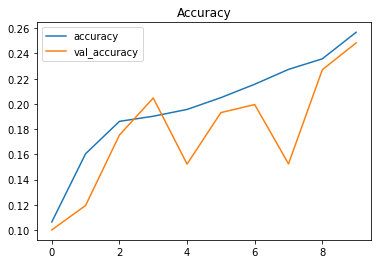

In [20]:
pd.DataFrame(history_3.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [21]:
train_loss, train_m = model_3.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_3.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(3)
desc.append('Глубже - больше слоев')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 8s - loss: 1.9127 - accuracy: 0.2511
313/313 - 2s - loss: 1.9113 - accuracy: 0.2484
train_loss: 1.9126845598220825, train_accuracy: 0.2511399984359741
test_loss: 1.9113439321517944, test_accuracy: 0.2484000027179718


313/313 [==============================] - 2s 6ms/step - loss: 1.9113 - accuracy: 0.2484
Test loss: 1.9113439321517944
Test accuracy: 0.2484000027179718


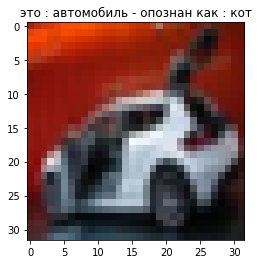

In [22]:
N = 6
scores = model_3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_p = model_3.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()


### Задача 4

Сравнить с точностью полносвязной сети для этой выборки

Model: "cnn_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290  

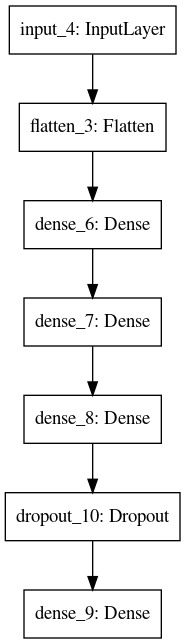

In [23]:
# Входные данные модели 
model_input = Input(shape=X_train.shape[1:])

# БЛОК 1: Полносвязанный слой 
x = Flatten()(model_input)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

# Создание модели 
model_4 = Model(model_input, x, name='cnn_4')

# Компиляция модели
model_4.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])


model_4.summary()
keras.utils.plot_model(model_4, "model.png")

In [24]:
history_4 = model_4.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 2.0628 - accuracy: 0.2416 - val_loss: 1.9402 - val_accuracy: 0.2911
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 1.8913 - accuracy: 0.3213 - val_loss: 1.9446 - val_accuracy: 0.2959
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 1.8201 - accuracy: 0.3504 - val_loss: 1.7517 - val_accuracy: 0.3679
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.7667 - accuracy: 0.3691 - val_loss: 1.7032 - val_accuracy: 0.3926
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 1.7287 - accuracy: 0.3878 - val_loss: 1.6494 - val_accuracy: 0.4074
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 1.6972 - accuracy: 0.4002 - val_loss: 1.8250 - val_accuracy: 0.3414
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 1.6713 - accuracy: 0.4077 - val_loss: 1.5921 - val_accuracy: 0.4356
Epoch 

#### Оценка результатов 

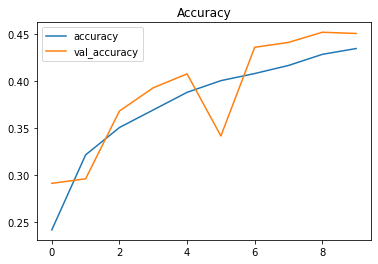

In [25]:
pd.DataFrame(history_4.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [26]:
train_loss, train_m = model_4.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_4.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(4)
desc.append('Полносвязная сеть')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 4s - loss: 1.5209 - accuracy: 0.4580
313/313 - 1s - loss: 1.5460 - accuracy: 0.4503
train_loss: 1.5208660364151, train_accuracy: 0.4580399990081787
test_loss: 1.5459916591644287, test_accuracy: 0.450300008058548


313/313 [==============================] - 1s 3ms/step - loss: 1.5460 - accuracy: 0.4503
Test loss: 1.5459916591644287
Test accuracy: 0.450300008058548


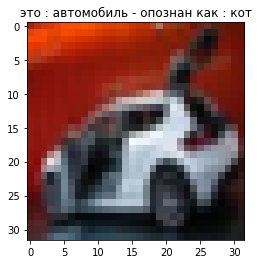

In [27]:
N = 6
scores = model_4.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_p = model_4.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()


In [28]:
results['step'] = step
results['desc'] = desc
results['train_acc'] = train_acc
results['test_acc'] = test_acc

In [29]:
results

,step,desc,train_acc,test_acc
0,1,Базовая модель,0.52,0.52
1,2,Шире - больше каналов,0.57,0.56
2,3,Глубже - больше слоев,0.25,0.25
3,4,Полносвязная сеть,0.46,0.45


### Выводы

- При увеличении количества каналов происходит увеличение качества модели 
- При увеличенни глубины происходит значительное снижение качества модели из-за затухания градиентов, в данном случае даже полносвязанная и менее глубокая модель показывает лучшие результаты.  